# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# Import your chosen baseline model
# Example: from sklearn.linear_model import LogisticRegression


## Model Choice

We choose the simplest neural network with just one (or a variable lenghth to take periodicity into account) input and one output neuron. This model takes the last water level(s) (gauge) and will predict the level (gauge) after one hour.


## Feature Selection

We will only use the water level feature of the dataset, to keep the baseline model as simple as possible. Afterwards we can asses how big the impact of the wind is, by comparing future models with this basic model.

Note, wind impact on water level is mostly small, only storm events have higher influence.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#-------------------------------------------------------------------------------------------------------------
# !Important! You need to create a copy of files and save it in your personal Google Drive to acces it in the code
#--------------------------------------------------------------------------------------------------------

#load in the files
#Hannes' path:
#file_path_tide = '/content/drive/My Drive/Kopie von Pegelstand.csv'
#file_path_sequences = '/content/drive/My Drive/Kopie von Subsequences.csv'
#Ludwigs path:
#file_path_tide = '/content/drive/MyDrive/Colab Notebooks/fishmarkt/Pegelstand.csv'
#file_path_sequences = '/content/drive/MyDrive/Colab Notebooks/fishmarkt/Subsequences.csv'
#Janikas path:
file_path_tide = '/content/drive/MyDrive/fishmarkt/Pegelstand.csv'
file_path_sequences = '/content/drive/MyDrive/Colab Notebooks/Subsequences.csv'
tides_data = pd.read_csv(file_path_tide)
subsequences = pd.read_csv(file_path_sequences)

#choose the biggest subset without missing values
inter_data = tides_data[subsequences[subsequences.columns[1]][0]:]

#convert the data into a 1D numpy array
tides = inter_data[tides_data.columns[1]].values

#function to split the data into features and labels using a moving window aproach
def create_time_series_dataset(time_series, n_steps, n_out):
    features, labels = [], []
    for i in range(len(time_series) - n_steps - n_out):
        feature = time_series[i:i+n_steps]  # Two consecutive values as features
        label = time_series[i+n_steps:i+n_steps+n_out]      # The upcoming value as label
        features.append(feature)
        labels.append(label)
    return np.array(features), np.array(labels)

#define the lenght of the feature vector
input_lenght = 48
output_lenght = 1

#calculate features and labels
X, Y = create_time_series_dataset(tides, input_lenght,output_lenght)


# Fixed Partitioning
lenght = np.shape(X)[0]
X_train = X[:int((lenght * 0.8)//1),:]
Y_train = Y[:int((lenght * 0.8)//1)]
X_test = X[int((lenght*0.8)//1) :,:]
Y_test = Y[int((lenght*0.8)//1) :,]

# Splitting the dataset
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#scale the training data and the test data (only scaling on the training data set, in order to avoid spill over of information to the test data set)
# scale X (historical) values train and test and not Y (labels) because Y should be stay in its originally size for better understandability
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# trying without scaling -> the difference of the root mean square error of calculations with and without scaling is only 0.21cm by a window of 48h
#X_train_norm = X_train
#X_test_norm = X_test


## Implementation

[Implement your baseline model here.]



In [ ]:
def basemodel(ts):
  return ts[-1]

pred = []

for i in X_test:
  pred.append(basemodel(i))

In [ ]:
b_mse = mean_squared_error(Y_test,pred)
print("Mean error: "+str(np.round(np.sqrt(b_mse),2))+" cm")#mean error

Mean error: 70.02 cm


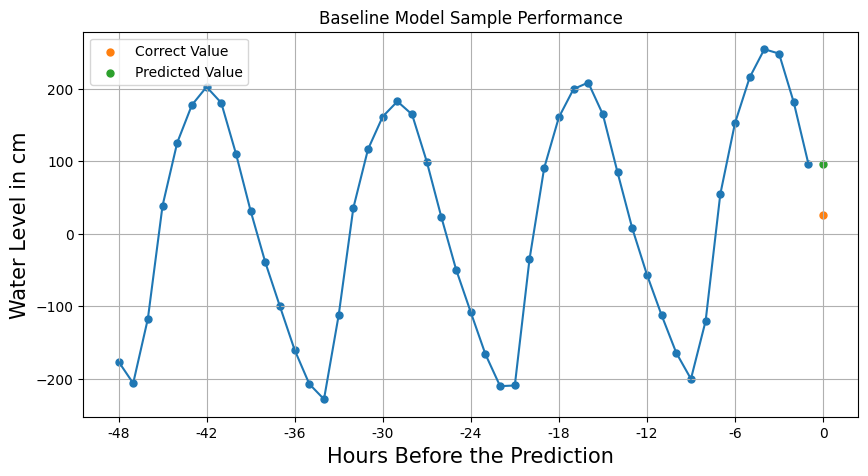

In [ ]:
#create simple plot
plt.figure(figsize=[10,5])
plt.scatter(np.arange(0,input_lenght,1),X_test[100],s=25)
plt.plot(np.arange(0,input_lenght,1),X_test[100])
plt.scatter([input_lenght],Y_test[100],label = "Correct Value",s=25)
plt.scatter([input_lenght],pred[100], label = "Predicted Value",s=25)
plt.legend()
plt.xticks(ticks=np.arange(0,49,6),labels=np.arange(-48,1,6))
plt.ylabel("Water Level in cm",fontsize=15)
plt.xlabel("Hours Before the Prediction",fontsize=15)
plt.title("Baseline Model Sample Performance")
plt.grid()

First simple model which repeats the last value:  
Data: Tide level data set which has no missing values  
Training: 80%, testing 20%  
Input: last 48 hours, Output: 1 value for the next hour  
rmse: 0.7m! - scale of tide is +-2m.

In [ ]:
# Define simple model, with just one input and one output neuron
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = input_lenght),
    tf.keras.layers.Dense(units = 1)            # no activation function because last value is the wanted prediction value and not some propability
])

#compile and train model
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(X_train_norm,Y_train, epochs = 20)


Epoch 1/20
1807/1807 [==============================] - 7s 4ms/step - loss: 2887.4138
Epoch 2/20
1807/1807 [==============================] - 3s 2ms/step - loss: 488.0769
Epoch 3/20
1807/1807 [==============================] - 3s 2ms/step - loss: 328.3341
Epoch 4/20
1807/1807 [==============================] - 3s 2ms/step - loss: 273.1084
Epoch 5/20
1807/1807 [==============================] - 5s 3ms/step - loss: 241.3493
Epoch 6/20
1807/1807 [==============================] - 3s 2ms/step - loss: 222.7836
Epoch 7/20
1807/1807 [==============================] - 3s 2ms/step - loss: 211.3501
Epoch 8/20
1807/1807 [==============================] - 3s 2ms/step - loss: 203.9715
Epoch 9/20
1807/1807 [==============================] - 4s 2ms/step - loss: 198.2304
Epoch 10/20
1807/1807 [==============================] - 4s 2ms/step - loss: 194.2058
Epoch 11/20
1807/1807 [==============================] - 3s 2ms/step - loss: 191.3684
Epoch 12/20
1807/1807 [==============================] - 3s 2m

## Evaluation

[Clearly state what metrics you will use to evaluate the model's performance. These metrics will serve as a starting point for evaluating more complex models later on.]



In [ ]:
#make prediction
Y_pred = model.predict(X_test_norm)

452/452 [==============================] - 1s 1ms/step


In [ ]:
# evaluate the prediction
mse = mean_squared_error(Y_test, Y_pred)
#print(np.mean(np.std([y_test[0],y_pred])))
print("RMSE: "+str(np.round(np.sqrt(mse),2))+" cm")#RMSE

RMSE: 12.32 cm


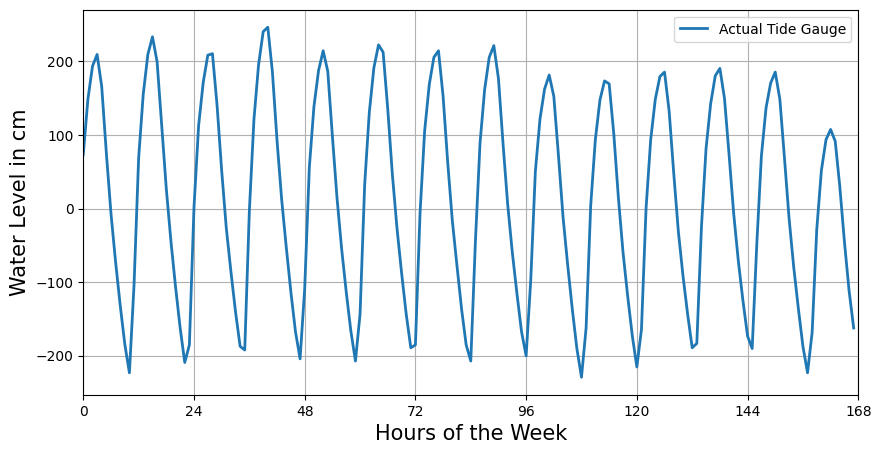

In [ ]:
plt.figure(figsize=[10,5])
#plt.scatter(np.arange(0,input_lenght,1),X_test[100],s=25)
plt.plot(Y_test.flatten()[168:336],linewidth=2, label="Actual Tide Gauge")
#plt.plot(Y_pred.flatten()[168:336],linewidth=2,label="Tide Gauge Baseline Model")
#plt.scatter([input_lenght],Y_test[100],label = "Correct Value",s=25)
#plt.scatter([input_lenght],Y_pred[100], label = "Predicted Value",s=25)
plt.legend()
plt.xticks(ticks=[0,24,48,72,96,120,144,168],labels=[0,24,48,72,96,120,144,168])
plt.ylabel("Water Level in cm",fontsize=15)
plt.xlim(0,168)
plt.xlabel("Hours of the Week",fontsize=15)
plt.grid()
plt.savefig("/content/baseline.png")

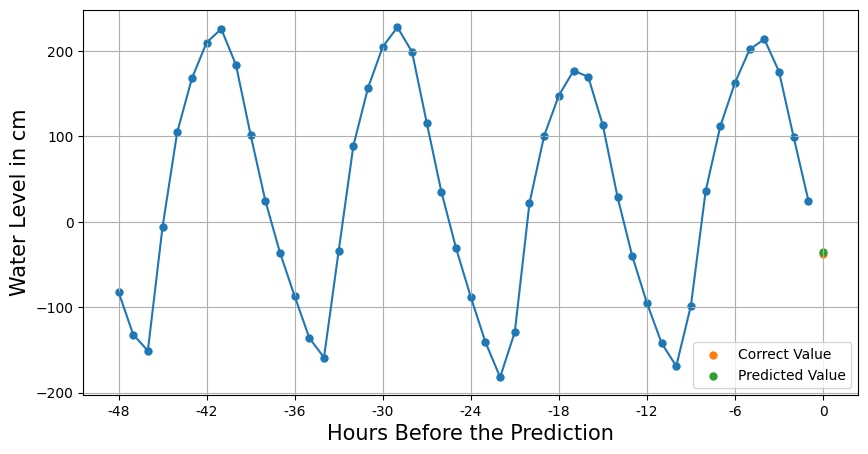

In [ ]:
#create simple plot
plt.figure(figsize=[10,5])
plt.scatter(np.arange(0,input_lenght,1),X_test[100],s=25)
plt.plot(np.arange(0,input_lenght,1),X_test[100])
plt.scatter([input_lenght],Y_test[100],label = "Correct Value",s=25)
plt.scatter([input_lenght],Y_pred[100], label = "Predicted Value",s=25)
plt.legend()
plt.xticks(ticks=np.arange(0,49,6),labels=np.arange(-48,1,6))
plt.ylabel("Water Level in cm",fontsize=15)
plt.xlabel("Hours Before the Prediction",fontsize=15)
plt.grid()

Simple neural network with two dense layers - one as an input and one as an output layer.  
Data set and train/test ratio is unchanged.  
Training data was scaled, impact is 0.21cm  
rmse: 13.31cm! - huge improvement

## Building A Model With Multiple Output Hours

In [ ]:
#Define input lenght and output lenght
input_lenght = 48
output_lenght = 6

#creating features and labels
X_mult, Y_mult = create_time_series_dataset(tides, input_lenght,output_lenght)

NameError: ignored

In [ ]:
#train test split
X_train_mult, X_test_mult, Y_train_mult, Y_test_mult = train_test_split(X_mult, Y_mult, test_size=0.2, random_state=42)

In [ ]:
#normalize the data
scaler = StandardScaler()
X_train_mult_norm = scaler.fit_transform(X_train_mult)
X_test_mult_norm = scaler.transform(X_test_mult)

#### Model predicting the last value for the coming steps

In [ ]:
#using first baselinemodel to make simplest prediction

pred_mult = []

for i in X_test_mult:
  guess = []
  for _ in range(output_lenght):
    guess.append(basemodel(i))
  pred_mult.append(guess)


In [ ]:
# evaluate the prediction
mse = mean_squared_error(Y_test_mult, pred_mult)/output_lenght
#print(np.mean(np.std([y_test[0],y_pred])))
print("Mean error: "+str(np.round(np.sqrt(mse),2))+" cm")#mean error

Mean error: 78.87 cm


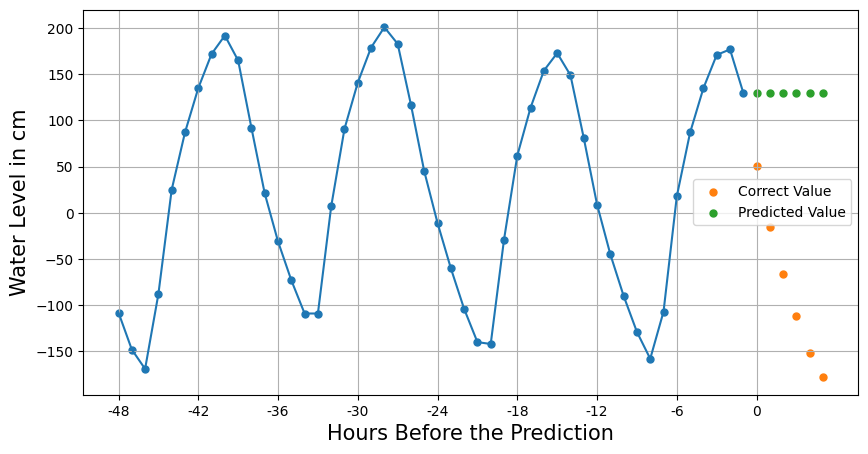

In [ ]:
#create simple plot
plt.figure(figsize=[10,5])
plt.scatter(np.arange(0,input_lenght,1),X_test_mult[100],s=25)
plt.plot(np.arange(0,input_lenght,1),X_test_mult[100])
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),Y_test_mult[100],label = "Correct Value",s=25)
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),pred_mult[100], label = "Predicted Value",s=25)
plt.legend()
plt.xticks(ticks=np.arange(0,49,6),labels=np.arange(-48,1,6))
plt.ylabel("Water Level in cm",fontsize=15)
plt.xlabel("Hours Before the Prediction",fontsize=15)
plt.grid()

Using the first/simples model which only returns the last known input value but instead of 1, six values are predicted.

#### Simple Model with two dense layers and 6 output values

In [ ]:
# Define simple model, with just one input and one output neuron
multi_model_simple = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = input_lenght),
    tf.keras.layers.Dense(units = output_lenght)            # no activation function because last value is the wanted prediction value and not some propability
])

#compile and train model
multi_model_simple.compile(optimizer = "adam", loss = "mean_squared_error")
multi_model_simple.fit(X_train_mult_norm,Y_train_mult, epochs = 20)

Epoch 1/20
1807/1807 [==============================] - 5s 2ms/step - loss: 3795.9365
Epoch 2/20
1807/1807 [==============================] - 10s 6ms/step - loss: 1149.5045
Epoch 3/20
1807/1807 [==============================] - 5s 3ms/step - loss: 825.7578
Epoch 4/20
1807/1807 [==============================] - 4s 2ms/step - loss: 722.6589
Epoch 5/20
1807/1807 [==============================] - 5s 3ms/step - loss: 688.0618
Epoch 6/20
1807/1807 [==============================] - 3s 2ms/step - loss: 667.4405
Epoch 7/20
1807/1807 [==============================] - 4s 2ms/step - loss: 652.8296
Epoch 8/20
1807/1807 [==============================] - 9s 5ms/step - loss: 641.5625
Epoch 9/20
1807/1807 [==============================] - 5s 3ms/step - loss: 632.5323
Epoch 10/20
1807/1807 [==============================] - 5s 3ms/step - loss: 625.0316
Epoch 11/20
1807/1807 [==============================] - 11s 6ms/step - loss: 619.5150
Epoch 12/20
1807/1807 [==============================] - 7s

In [ ]:
#make prediction
Y_pred_mult = multi_model_simple.predict(X_test_mult_norm)
print(Y_pred_mult)

452/452 [==============================] - 1s 2ms/step
[[ 191.37843   136.74184    52.780254  -10.288782  -56.824993 -100.7313  ]
 [ -91.82238    22.898565  111.71624   156.75806   189.62277   202.0816  ]
 [ -63.245735 -113.699646 -180.53198  -215.08215  -118.27575    35.21212 ]
 ...
 [  60.17897   158.81372   211.30455   247.15634   223.85526   144.25354 ]
 [ 188.31938   197.45433   148.55444    63.766632  -11.555522  -65.25206 ]
 [  43.080036  -20.487494  -69.33739  -121.71258  -132.85562   -45.656693]]


In [ ]:
# evaluate the prediction
mse = mean_squared_error(Y_test_mult, Y_pred_mult)
#print(np.mean(np.std([y_test[0],y_pred])))
print("Mean error: "+str(np.round(np.sqrt(mse),2))+" cm")#mean error

Mean error: 24.07 cm


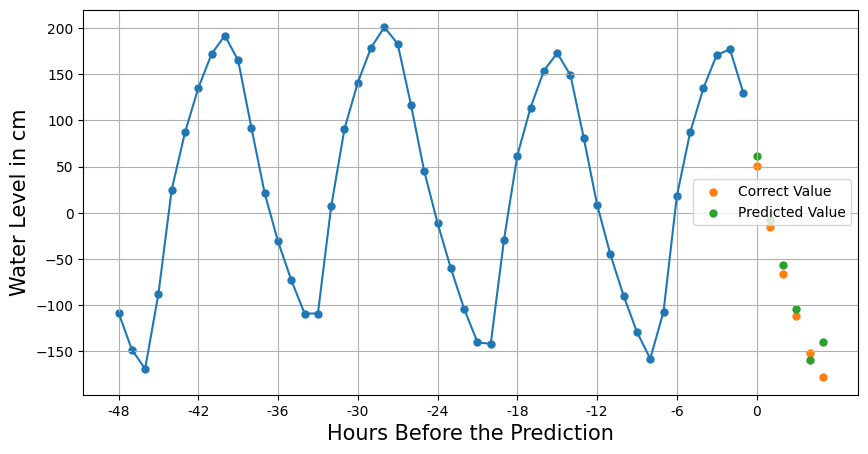

In [ ]:
#create simple plot
plt.figure(figsize=[10,5])
plt.scatter(np.arange(0,input_lenght,1),X_test_mult[100],s=25)
plt.plot(np.arange(0,input_lenght,1),X_test_mult[100])
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),Y_test_mult[100],label = "Correct Value",s=25)
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),Y_pred_mult[100], label = "Predicted Value",s=25)
plt.legend()
plt.xticks(ticks=np.arange(0,49,6),labels=np.arange(-48,1,6))
plt.ylabel("Water Level in cm",fontsize=15)
plt.xlabel("Hours Before the Prediction",fontsize=15)
plt.grid()

Reusing the simple model with two dense layers. One as input layer, on as output layer. Second one has now 6 units representing 6 hours in the future.  
rmse: 24.07cm.

The plot shows a first difficulty. The prediction of the extrema has higher deviation. It would be expectedly that storm surges have much higher deviations!

#### Simple Model with three dense layers

In [ ]:
multi_model_3Dense = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = input_lenght),
    tf.keras.layers.Dense(units = 64, activation = "relu"),
    tf.keras.layers.Dense(units = 128, activation = "relu"),
    tf.keras.layers.Dense(units = 256, activation = "relu"),
    tf.keras.layers.Dense(units = output_lenght)            # no activation function because last value is the wanted prediction value and not some propability
])

#compile and train model
multi_model_3Dense.compile(optimizer = "adam", loss = "mean_squared_error")
multi_model_3Dense.fit(X_train_mult_norm,Y_train_mult, epochs = 20)

Epoch 1/20
1807/1807 [==============================] - 11s 5ms/step - loss: 1286.2544
Epoch 2/20
1807/1807 [==============================] - 5s 3ms/step - loss: 522.7935
Epoch 3/20
1807/1807 [==============================] - 7s 4ms/step - loss: 472.0622
Epoch 4/20
1807/1807 [==============================] - 7s 4ms/step - loss: 453.7617
Epoch 5/20
1807/1807 [==============================] - 5s 3ms/step - loss: 433.5737
Epoch 6/20
1807/1807 [==============================] - 8s 4ms/step - loss: 426.4643
Epoch 7/20
1807/1807 [==============================] - 5s 3ms/step - loss: 413.6678
Epoch 8/20
1807/1807 [==============================] - 5s 3ms/step - loss: 405.9503
Epoch 9/20
1807/1807 [==============================] - 8s 4ms/step - loss: 396.0212
Epoch 10/20
1807/1807 [==============================] - 5s 3ms/step - loss: 395.2797
Epoch 11/20
1807/1807 [==============================] - 6s 3ms/step - loss: 385.7956
Epoch 12/20
1807/1807 [==============================] - 7s 4

In [ ]:
#make prediction
Y_pred_mult_3 = multi_model_3Dense.predict(X_test_mult_norm)
print(Y_pred_mult_3)

452/452 [==============================] - 1s 3ms/step
[[ 196.83504   147.43176    69.70742     3.420375  -50.541664 -100.62898 ]
 [-119.52209    14.953571  100.85679   160.9608    203.39507   220.2356  ]
 [ -57.61338  -117.58235  -165.06396  -201.87306  -128.9297     23.778706]
 ...
 [  66.06322   147.37396   200.78072   236.59294   227.0783    158.35468 ]
 [ 175.27733   183.72133   139.82556    59.74137   -13.320489  -71.108246]
 [  55.68128    -6.075307  -58.141308 -104.40986  -135.59349   -30.566658]]


In [ ]:
# evaluate the prediction
mse = mean_squared_error(Y_test_mult, Y_pred_mult_3)
#print(np.mean(np.std([y_test[0],y_pred])))
print("Mean error: "+str(np.round(np.sqrt(mse),2))+" cm")#mean error

Mean error: 19.05 cm


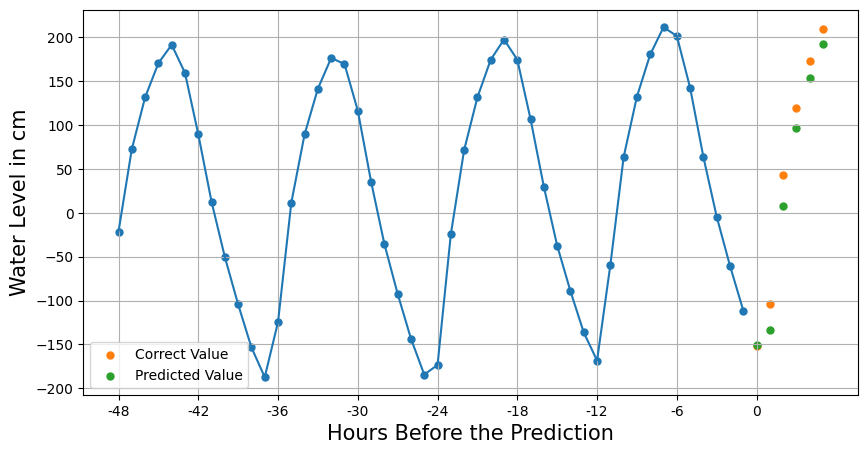

In [ ]:
#create simple plot
plt.figure(figsize=[10,5])
plt.scatter(np.arange(0,input_lenght,1),X_test_mult[205],s=25)
plt.plot(np.arange(0,input_lenght,1),X_test_mult[205])
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),Y_test_mult[205],label = "Correct Value",s=25)
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),Y_pred_mult_3[205], label = "Predicted Value",s=25)
plt.legend()
plt.xticks(ticks=np.arange(0,49,6),labels=np.arange(-48,1,6))
plt.ylabel("Water Level in cm",fontsize=15)
plt.xlabel("Hours Before the Prediction",fontsize=15)
plt.grid()

Similar model, only change is additional three hidden dense layers.  
rmse: 19.05cm.  
This shows an improvement of 21%. With round about a similar computation time.

Possibility: Adding a learn scheduler for the optimizer and than train the model with the optimal learning rate.

#### Simple feedback model with 32 LSTM cells and one dense layer

In [ ]:
simple_feedback_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 32, input_shape = (None,1)),
    tf.keras.layers.Dense(units = input_lenght),
    tf.keras.layers.Dense(units = output_lenght)

])

In [ ]:
simple_feedback_model.compile(optimizer= "adam", loss = "mean_squared_error")
simple_feedback_model.fit(X_train_mult_norm, Y_train_mult,epochs = 20)

Epoch 1/20
1807/1807 [==============================] - 46s 24ms/step - loss: 3913.9924
Epoch 2/20
1807/1807 [==============================] - 42s 23ms/step - loss: 1078.0686
Epoch 3/20
1807/1807 [==============================] - 42s 23ms/step - loss: 722.1589
Epoch 4/20
1807/1807 [==============================] - 44s 24ms/step - loss: 560.6595
Epoch 5/20
1807/1807 [==============================] - 41s 23ms/step - loss: 493.5458
Epoch 6/20
1807/1807 [==============================] - 42s 23ms/step - loss: 456.2737
Epoch 7/20
1807/1807 [==============================] - 44s 24ms/step - loss: 434.5485
Epoch 8/20
1807/1807 [==============================] - 41s 23ms/step - loss: 422.4977
Epoch 9/20
1807/1807 [==============================] - 43s 24ms/step - loss: 412.5490
Epoch 10/20
1807/1807 [==============================] - 43s 24ms/step - loss: 404.0119
Epoch 11/20
1807/1807 [==============================] - 41s 23ms/step - loss: 398.1732
Epoch 12/20
1807/1807 [================

In [ ]:
#make prediction
Y_pred_mult_sfeed = simple_feedback_model.predict(X_test_mult_norm)

452/452 [==============================] - 4s 9ms/step


In [ ]:
# evaluate the prediction
mse = mean_squared_error(Y_test_mult, Y_pred_mult_sfeed)
#print(np.mean(np.std([y_test[0],y_pred])))
print("Mean error: "+str(np.round(np.sqrt(mse),2))+" cm")#mean error

Mean error: 18.83 cm


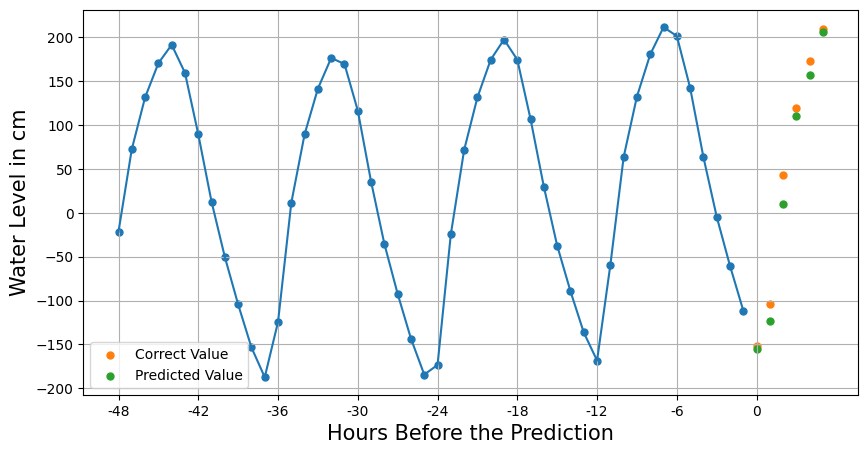

In [ ]:
#create simple plot
plt.figure(figsize=[10,5])
plt.scatter(np.arange(0,input_lenght,1),X_test_mult[205],s=25)
plt.plot(np.arange(0,input_lenght,1),X_test_mult[205])
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),Y_test_mult[205],label = "Correct Value",s=25)
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),Y_pred_mult_sfeed[205], label = "Predicted Value",s=25)
plt.legend()
plt.xticks(ticks=np.arange(0,49,6),labels=np.arange(-48,1,6))
plt.ylabel("Water Level in cm",fontsize=15)
plt.xlabel("Hours Before the Prediction",fontsize=15)
plt.grid()

Model contains 1 LSTM, 1 input dense and 1 output dense layer.  
rmse: 18.83cm, improvement of 1.15% but computational time needs way more time!

#### LSTM model with two LSTM Layers and one Dense Layer

In [ ]:
lstm_2_feedback_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 32, input_shape = (input_lenght,1), return_sequences = True),
    tf.keras.layers.LSTM(units = 64),
    tf.keras.layers.Dense(units = 64,activation = "relu"),
    tf.keras.layers.Dense(units = output_lenght)

])

In [ ]:
lstm_2_feedback_model.compile(optimizer= "adam", loss = "mean_squared_error")
lstm_2_feedback_model.fit(X_train_mult_norm, Y_train_mult,epochs = 20)

Epoch 1/20
1807/1807 [==============================] - 103s 52ms/step - loss: 11281.7842
Epoch 2/20
1807/1807 [==============================] - 88s 49ms/step - loss: 9179.7930
Epoch 3/20
1807/1807 [==============================] - 87s 48ms/step - loss: 2482.9412
Epoch 4/20
1807/1807 [==============================] - 87s 48ms/step - loss: 1481.3160
Epoch 5/20
1807/1807 [==============================] - 88s 48ms/step - loss: 1210.5903
Epoch 6/20
1807/1807 [==============================] - 90s 50ms/step - loss: 935.7230
Epoch 7/20
1807/1807 [==============================] - 88s 48ms/step - loss: 785.2577
Epoch 8/20
1807/1807 [==============================] - 88s 49ms/step - loss: 697.7332
Epoch 9/20
1807/1807 [==============================] - 88s 49ms/step - loss: 652.0125
Epoch 10/20
1807/1807 [==============================] - 90s 50ms/step - loss: 586.1232
Epoch 11/20
1807/1807 [==============================] - 88s 49ms/step - loss: 534.1050
Epoch 12/20
1807/1807 [===========

In [ ]:
#make prediction
Y_pred_mult_2feed = lstm_2_feedback_model.predict(X_test_mult_norm)

452/452 [==============================] - 8s 16ms/step


In [ ]:
# evaluate the prediction
mse = mean_squared_error(Y_test_mult, Y_pred_mult_2feed)
#print(np.mean(np.std([y_test[0],y_pred])))
print("Mean error: "+str(np.round(np.sqrt(mse),2))+" cm")#mean error

Mean error: 19.76 cm


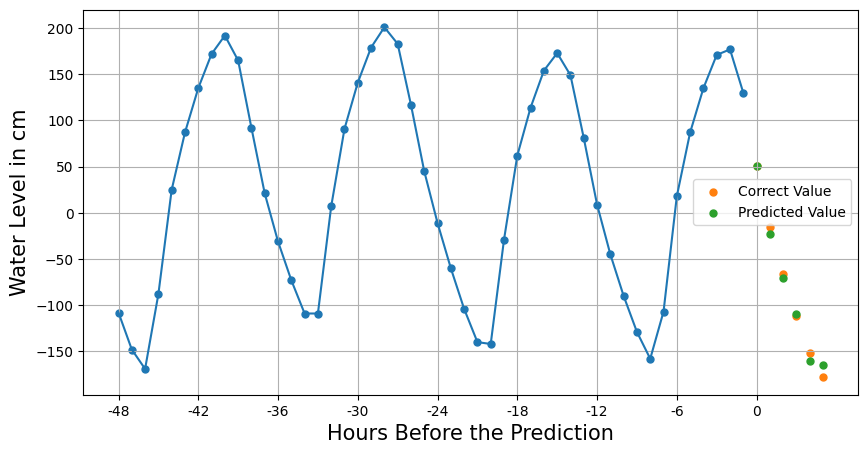

In [ ]:
#create simple plot
plt.figure(figsize=[10,5])
plt.scatter(np.arange(0,input_lenght,1),X_test_mult[100],s=25)
plt.plot(np.arange(0,input_lenght,1),X_test_mult[100])
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),Y_test_mult[100],label = "Correct Value",s=25)
plt.scatter(np.arange(input_lenght,output_lenght+input_lenght,1),Y_pred_mult_2feed[100], label = "Predicted Value",s=25)
plt.legend()
plt.xticks(ticks=np.arange(0,49,6),labels=np.arange(-48,1,6))
plt.ylabel("Water Level in cm",fontsize=15)
plt.xlabel("Hours Before the Prediction",fontsize=15)
plt.grid()

Model with 2 LSTM, 1 hidden dense layer  
rmse: 19.76cm - slightly worse and computational time is again longer.

In [ ]:
lstm_v2_feedback_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 64, input_shape = (input_lenght,1), return_sequences = True),
    tf.keras.layers.LSTM(units = 32),
    tf.keras.layers.Dense(units = 64,activation = "relu"),
    tf.keras.layers.Dense(units = output_lenght)

])

NameError: ignored

In [ ]:
lstm_v2_feedback_model.compile(optimizer= "adam", loss = "mean_squared_error")
lstm_v2_feedback_model.fit(X_train_mult_norm, Y_train_mult,epochs = 20)

Epoch 1/20
1807/1807 [==============================] - 98s 52ms/step - loss: 3983.7944
Epoch 2/20
1807/1807 [==============================] - 92s 51ms/step - loss: 990.5652
Epoch 3/20
1807/1807 [==============================] - 96s 53ms/step - loss: 696.9794
Epoch 4/20
1807/1807 [==============================] - 92s 51ms/step - loss: 520.7407
Epoch 5/20
1807/1807 [==============================] - 94s 52ms/step - loss: 460.2262
Epoch 6/20
1807/1807 [==============================] - 96s 53ms/step - loss: 425.7194
Epoch 7/20
1807/1807 [==============================] - 94s 52ms/step - loss: 404.1488
Epoch 8/20
1807/1807 [==============================] - 93s 51ms/step - loss: 390.3255
Epoch 9/20
1807/1807 [==============================] - 91s 50ms/step - loss: 375.6589
Epoch 10/20
1807/1807 [==============================] - 92s 51ms/step - loss: 366.3956
Epoch 11/20
1807/1807 [==============================] - 92s 51ms/step - loss: 356.8272
Epoch 12/20
1807/1807 [=================

In [ ]:
#make prediction
Y_pred_mult_v2feed = lstm_v2_feedback_model.predict(X_test_mult_norm)

NameError: ignored